In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

Unnamed: 0      Nom      Etat Code_Etat  id_Etat  id_county     NAME  \
1210        1210  Carroll  Maryland        MD    27302      28550  Carroll   
1535        1535    Henry  Missouri        MO      154      28880    Henry   
1531        1531   Gentry  Missouri        MO      154      28876   Gentry   
756          756   Martin   Indiana        IN      151        510   Martin   
977          977    Riley    Kansas        KS    27298      28315    Riley   

                                               geometry     fips  \
1210  POLYGON ((-77.31151 39.639137999999996, -77.30...  24013.0   
1535  POLYGON ((-94.07372099999999 38.258083, -94.07...  29083.0   
1531  POLYGON ((-94.605942 40.126127, -94.605629 40....  29075.0   
756   POLYGON ((-86.924212 38.530602, -86.9240629999...  18101.0   
977   POLYGON ((-96.96094699999999 39.286698, -96.96...  20161.0   

      unemp_rate_year_2013  ...  bachelors_deg_year_2018  score_legis  \
1210                   4.6  ...                     35.6         4.80   
1535                   6.7  ...                     15.5         0.40   
1531                   5.4  ...                     18.0         0.40   
756                    5.3  ...                     13.4         2.35   
977                    3.4  ...                     46.0         0.90   

      bchecks_2013  bchecks_2014  bchecks_2015  bchecks_2016  bchecks_2017  \
1210        231182        142207        125694        165367        158659   
1535        567009        517063        584875        632319        524973   
1531        567009        517063        584875        632319        524973   
756         597124        647550       1076917       1436725        830357   
977         228105        172167        185859        196548        191451   

      bchecks_2018   per_dem   per_gop  
1210        151470  0.286455  0.654968  
1535        496184  0.239066  0.717605  
1531        496184  0.199472  0.759644  
756         896148  0.183274  0.768671  
977         172047  0.434286  0.479463  

[5 rows x 48 columns]

In [3]:
gun_violence_db = pd.read_csv('/home/onyxia/work/data/df_gun_violence.csv')
gun_violence_db.sample(5)

Unnamed: 0  incident_id        date     state      city_or_county  \
204783      203977       918169  2017-08-21  Illinois  Chicago (Roseland)   
42406        40050       208131  2014-10-18  Nebraska               Omaha   
101292       99413       457011  2015-12-01     Texas         San Antonio   
191031      189693       858807  2017-06-03  Maryland           Baltimore   
69495        67898       338521  2015-05-11  Kentucky          Vine Grove   

                           address  n_killed  n_injured  \
204783  11300 block of S Eggleston         0          1   
42406            24th and B Street         1          0   
101292     4331 Vance Jackson Road         0          2   
191031   1800 block of Rutland Ave         1          0   
69495        Willow Crossing Court         2          0   

                                             incident_url  \
204783  http://www.gunviolencearchive.org/incident/918169   
42406   http://www.gunviolencearchive.org/incident/208131   
101292  http://www.gunviolencearchive.org/incident/457011   
191031  http://www.gunviolencearchive.org/incident/858807   
69495   http://www.gunviolencearchive.org/incident/338521   

                                               source_url  ...  vict_injured  \
204783  http://chicago.suntimes.com/news/man-shot-in-r...  ...             1   
42406   http://www.ketv.com/news/4-accused-in-shooting...  ...             0   
101292  http://www.ksat.com/news/sapd-2-shot-during-su...  ...             1   
191031   http://www.baltimoresun.com/news/maryland/crime/  ...             0   
69495   http://www.wave3.com/story/29043282/vine-grove...  ...             0   

        vict_arrested vict_unharmed vict_killed handgun  rifle Nine_mm  \
204783              0             0           0       0      0       0   
42406               0             0           1       0      0       0   
101292              0             0           0       0      0       0   
191031              0             0           1       0      0       0   
69495               0             0           1       0      0       0   

        shotgun  young_sus young_vict  
204783        0          0          1  
42406         0          1          1  
101292        0          0          0  
191031        0          0          1  
69495         0          0          0  

[5 rows x 53 columns]

In [4]:
from shapely import wkt
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
total_db = total_db.dropna(subset=['geometry'])
total_db['geometry'] = total_db['geometry'].apply(wkt_loads)

In [5]:
total_db = total_db.loc[total_db['Etat'] != 'Alaska']
total_db = total_db.loc[total_db['Etat'] != 'Hawaii']

gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Alaska']
gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Hawaii']

In [6]:
total_db_geo = (
    gpd.GeoDataFrame(total_db)
    .set_geometry('geometry')
    .set_crs('EPSG:4269')
)

In [7]:
#changement de valeur pour Richmond, Virginia car valeur aberrante de 8.755 alors qu'il y avait 204 214	habitants en 2010
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2013'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2014'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2015'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2016'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2017'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2018'] = 204.214 

In [8]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gun_violence_db['longitude'], gun_violence_db['latitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=geometry, crs='EPSG:4326')

gun_violence_geo = gun_violence_geo.set_crs('EPSG:4326')
gun_violence_geo = gun_violence_geo[gun_violence_geo.geometry.x <= -50]

Tentative de merge les deux bases

In [9]:
total_db_geo=total_db_geo.to_crs('EPSG:4326')
merge_geo = gpd.sjoin(gun_violence_geo, total_db_geo, predicate='within')
geom_county=total_db_geo[['id_county','geometry']]
geom_county.head()

id_county                                           geometry
0      27336  POLYGON ((-86.92119 32.65754, -86.92035 32.658...
1      27337  POLYGON ((-88.02858 30.22676, -88.02399 30.230...
2      27338  POLYGON ((-85.74803 31.61918, -85.74543 31.618...
3      27339  POLYGON ((-87.42194 33.00338, -87.31854 33.006...
4      27340  POLYGON ((-86.96336 33.85822, -86.95967 33.857...

In [10]:
merge_geo2=pd.merge(merge_geo, geom_county, on='id_county')
merge_geo2.head()

Unnamed: 0_left  incident_id        date         state  \
0           100178       461105  2013-01-01  Pennsylvania   
1           104811       481268  2013-10-21  Pennsylvania   
2              678        94128  2014-01-08  Pennsylvania   
3              801        94504  2014-01-08  Pennsylvania   
4             1324        95999  2014-01-10  Pennsylvania   

          city_or_county                                    address  n_killed  \
0             Mckeesport  1506 Versailles Avenue and Coursin Street         0   
1  Pittsburgh (Homewood)                 7200 block of Kelly Street         2   
2              Homestead           Steak ‘n Shake at The Waterfront         1   
3                Munhall                Waterfront Shopping Complex         1   
4             Pittsburgh                 2000 block of Fifth Avenue         0   

   n_injured                                       incident_url  \
0          4  http://www.gunviolencearchive.org/incident/461105   
1          5  http://www.gunviolencearchive.org/incident/481268   
2          0   http://www.gunviolencearchive.org/incident/94128   
3          0   http://www.gunviolencearchive.org/incident/94504   
4          1   http://www.gunviolencearchive.org/incident/95999   

                                          source_url  ...  score_legis  \
0  http://www.post-gazette.com/local/south/2013/0...  ...          4.0   
1  http://www.wtae.com/news/local/allegheny/two-p...  ...          4.0   
2  http://pittsburgh.cbslocal.com/2014/01/22/u-s-...  ...          4.0   
3  http://www.post-gazette.com/local/south/2014/0...  ...          4.0   
4  /pittsburgh.cbslocal.com/2014/01/11/man-wounde...  ...          4.0   

   bchecks_2013 bchecks_2014 bchecks_2015 bchecks_2016  bchecks_2017  \
0       1044731       899241       993429      1143220       1062651   
1       1044731       899241       993429      1143220       1062651   
2       1044731       899241       993429      1143220       1062651   
3       1044731       899241       993429      1143220       1062651   
4       1044731       899241       993429      1143220       1062651   

  bchecks_2018   per_dem  per_gop  \
0      1021943  0.564416  0.40034   
1      1021943  0.564416  0.40034   
2      1021943  0.564416  0.40034   
3      1021943  0.564416  0.40034   
4      1021943  0.564416  0.40034   

                                          geometry_y  
0  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  
1  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  
2  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  
3  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  
4  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  

[5 rows x 103 columns]

In [11]:
merge_geo = merge_geo2.rename(columns={'geometry_x': 'point_geometry', 'geometry_y': 'polygon_geometry'})
merge_geo.head()

Unnamed: 0_left  incident_id        date         state  \
0           100178       461105  2013-01-01  Pennsylvania   
1           104811       481268  2013-10-21  Pennsylvania   
2              678        94128  2014-01-08  Pennsylvania   
3              801        94504  2014-01-08  Pennsylvania   
4             1324        95999  2014-01-10  Pennsylvania   

          city_or_county                                    address  n_killed  \
0             Mckeesport  1506 Versailles Avenue and Coursin Street         0   
1  Pittsburgh (Homewood)                 7200 block of Kelly Street         2   
2              Homestead           Steak ‘n Shake at The Waterfront         1   
3                Munhall                Waterfront Shopping Complex         1   
4             Pittsburgh                 2000 block of Fifth Avenue         0   

   n_injured                                       incident_url  \
0          4  http://www.gunviolencearchive.org/incident/461105   
1          5  http://www.gunviolencearchive.org/incident/481268   
2          0   http://www.gunviolencearchive.org/incident/94128   
3          0   http://www.gunviolencearchive.org/incident/94504   
4          1   http://www.gunviolencearchive.org/incident/95999   

                                          source_url  ...  score_legis  \
0  http://www.post-gazette.com/local/south/2013/0...  ...          4.0   
1  http://www.wtae.com/news/local/allegheny/two-p...  ...          4.0   
2  http://pittsburgh.cbslocal.com/2014/01/22/u-s-...  ...          4.0   
3  http://www.post-gazette.com/local/south/2014/0...  ...          4.0   
4  /pittsburgh.cbslocal.com/2014/01/11/man-wounde...  ...          4.0   

   bchecks_2013 bchecks_2014 bchecks_2015 bchecks_2016  bchecks_2017  \
0       1044731       899241       993429      1143220       1062651   
1       1044731       899241       993429      1143220       1062651   
2       1044731       899241       993429      1143220       1062651   
3       1044731       899241       993429      1143220       1062651   
4       1044731       899241       993429      1143220       1062651   

  bchecks_2018   per_dem  per_gop  \
0      1021943  0.564416  0.40034   
1      1021943  0.564416  0.40034   
2      1021943  0.564416  0.40034   
3      1021943  0.564416  0.40034   
4      1021943  0.564416  0.40034   

                                    polygon_geometry  
0  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  
1  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  
2  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  
3  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  
4  POLYGON ((-80.36078 40.47760, -80.34227 40.490...  

[5 rows x 103 columns]

In [12]:
pd.set_option('display.max_columns', None)
merge_geo.sample()

Unnamed: 0_left  incident_id        date     state city_or_county  \
21516            46379       225716  2014-11-26  Maryland      Baltimore   

                            address  n_killed  n_injured  \
21516  100 block of N. Carey Street         0          1   

                                            incident_url  \
21516  http://www.gunviolencearchive.org/incident/225716   

                                              source_url  \
21516  http://www.baltimoresun.com/news/maryland/crim...   

       incident_url_fields_missing  congressional_district gun_stolen  \
21516                        False                     7.0        NaN   

      gun_type incident_characteristics  latitude location_description  \
21516      NaN                      NaN   39.2915                  NaN   

       longitude  n_guns_involved notes participant_age participant_age_group  \
21516   -76.6383              NaN   NaN             NaN      {0: 'Adult 18+'}   

      participant_gender participant_name participant_relationship  \
21516        {0: 'Male'}              NaN                      NaN   

      participant_status participant_type sources  state_house_district  \
21516     {0: 'Injured'}    {0: 'Victim'}     NaN                   NaN   

       state_senate_district  indic_suicide  indic_defens  indic_school  \
21516                   44.0              0             0             0   

       indic_home_inv  indic_accident  sus_adulte  vict_adulte  sus_male  \
21516               0               0           0            1         0   

       vict_male  sus_injured  sus_arrested  sus_unharmed  sus_killed  \
21516          1            0             0             0           0   

       vict_injured  vict_arrested  vict_unharmed  vict_killed  handgun  \
21516             1              0              0            0        0   

       rifle  Nine_mm  shotgun  young_sus  young_vict  \
21516      0        0        0          0           0   

                   point_geometry  index_right  Unnamed: 0_right        Nom  \
21516  POINT (-76.63830 39.29150)         1207              1207  Baltimore   

           Etat Code_Etat  id_Etat  id_county       NAME     fips  \
21516  Maryland        MD    27302      28547  Baltimore  24510.0   

       unemp_rate_year_2013  unemp_rate_year_2014  unemp_rate_year_2015  \
21516                   8.5                   7.6                   6.4   

       unemp_rate_year_2016  unemp_rate_year_2017  unemp_rate_year_2018  \
21516                   5.9                   5.6                   6.3   

       med_h_income_year_2013  med_h_income_year_2014  med_h_income_year_2015  \
21516                 41988.0                 41895.0                 43192.0   

       med_h_income_year_2016  med_h_income_year_2017  med_h_income_year_2018  \
21516                 46604.0                 46762.0                 50501.0   

       resident_pop_year_2013  resident_pop_year_2014  resident_pop_year_2015  \
21516                 622.591                 623.833                 622.831   

       resident_pop_year_2016  resident_pop_year_2017  resident_pop_year_2018  \
21516                 616.542                 610.853                 603.241   

       snap_beneficiaries_year_2013  snap_beneficiaries_year_2014  \
21516                      217100.0                      206792.0   

       snap_beneficiaries_year_2015  snap_beneficiaries_year_2016  \
21516                      199796.0                      188094.0   

       snap_beneficiaries_year_2017  snap_beneficiaries_year_2018  \
21516                      176445.0                      166710.0   

       bachelors_deg_year_2013  bachelors_deg_year_2014  \
21516                     26.8                     27.7   

       bachelors_deg_year_2015  bachelors_deg_year_2016  \
21516                     28.7                     29.7   

       bachelors_deg_year_2017  bachelors_deg_year_2018  score_legis  \
21516                     30.4              

# Stats descriptives sur les indicateurs socio-économiques des comtés
## Revenu médian

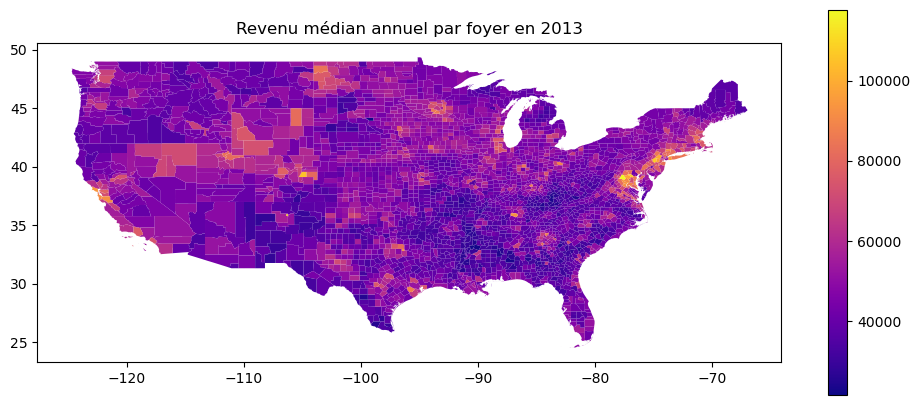

In [13]:
total_db_geo.plot(aspect = 1, figsize = (12,5), column = "med_h_income_year_2013", legend = True, cmap = "plasma", linewidth = 0.1)
plt.title("Revenu médian annuel par foyer en 2013")
plt.show()

Ces représentations sont difficilement lisibles car il y a beaucoup de comtés. Une solution est de classer les comtés et de les colorier en fonction de leur classement, en définissant par exemple 4 quantiles. 

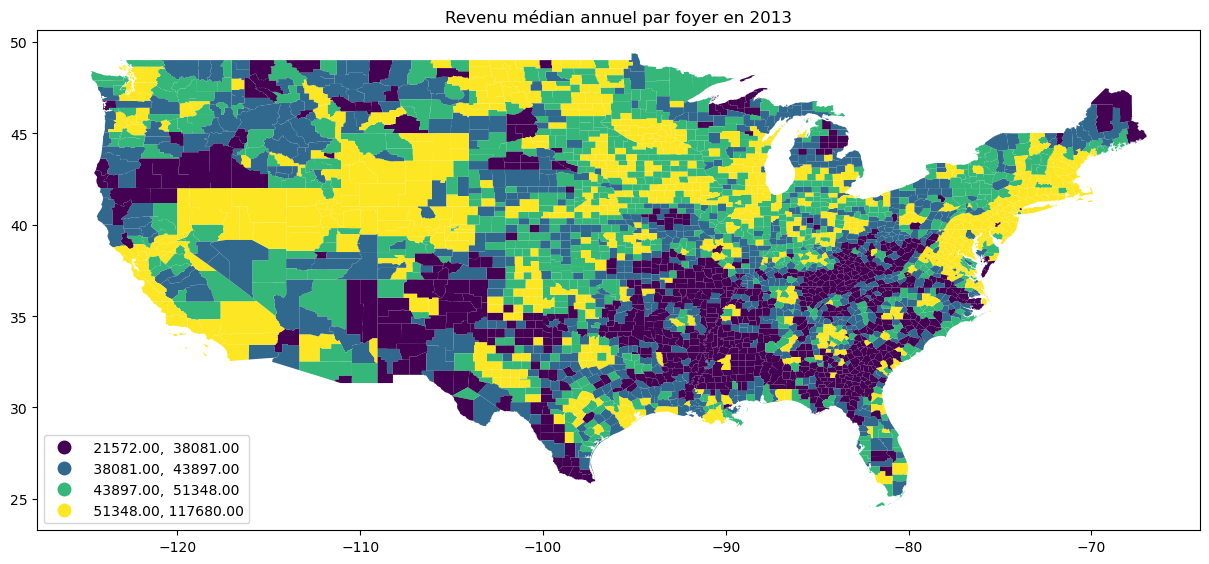

In [14]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "med_h_income_year_2013", legend = True, 
scheme = "Quantiles", k = 4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Revenu médian annuel par foyer en 2013")
plt.show()

Cette représentation a l'avantage de permettre de distinguer rapidement des groupes de comtés. Cependant, il faut garder en tête que la dernière catégorie recouvre beaucoup de valeurs différentes (du simple au double).

On voit sur cette carte que les comtés du Sud-Ouest sont ceux avec le revenu médian le plus faible, alors que les plus rivhes se situent surtout au Nord.

Text(0.5, 0, 'Revenu annuel médian par foyer en 2013')

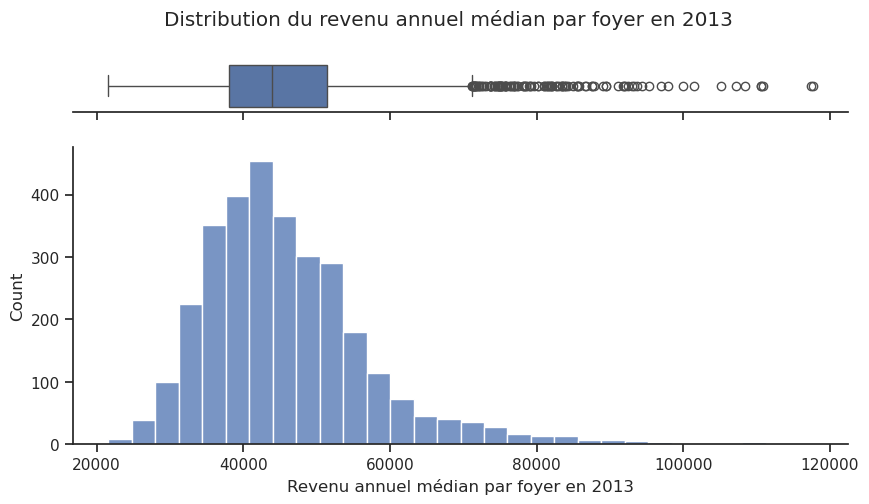

In [15]:
sns.set(style="ticks")
x = total_db_geo["med_h_income_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (10, 5), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.suptitle("Distribution du revenu annuel médian par foyer en 2013")
ax_hist.set_xlabel('Revenu annuel médian par foyer en 2013')

La distribution du revenu annuel médian par foyer en 2013 semble suivre une loi log-normale, car elle ressemble à une normale avec une plus grande queue à droite. Le box-plot semble confirmer cela : les "valeurs aberrantes" ne sont présentes qu'à droite de la distribution.

## Proportion de détenteurs d'un bachelor

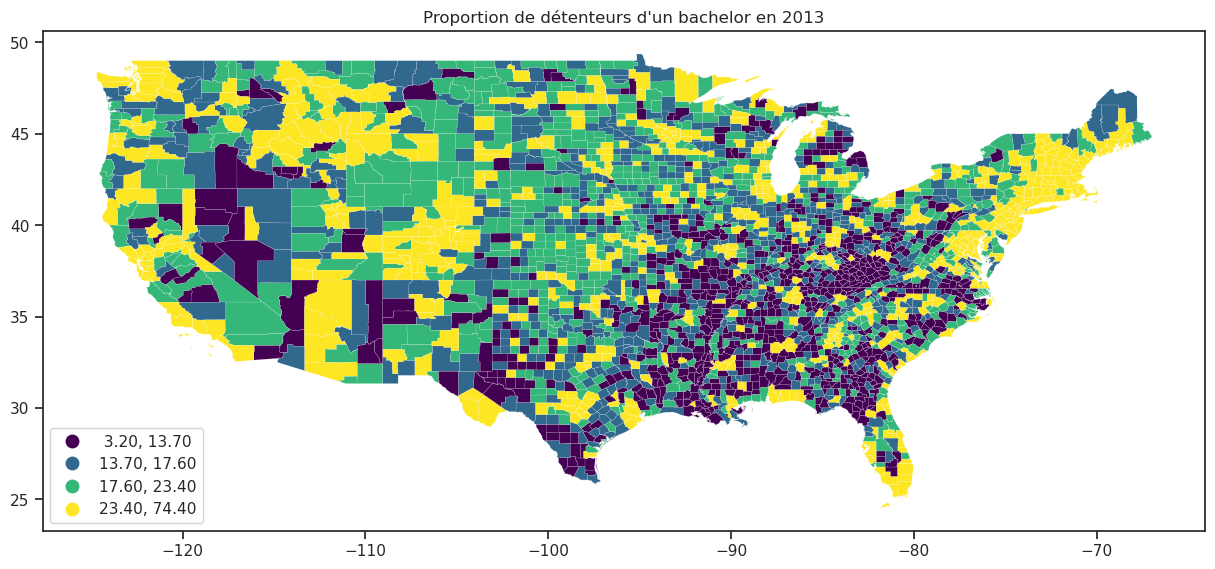

In [16]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "bachelors_deg_year_2013", legend = True, scheme = "QUANTILES", 
k=4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Proportion de détenteurs d'un bachelor en 2013")
plt.show()

A nouveau, le Nord-Est est privilégié, avec la plus grosse part de détententeurs de bachelors. Le Sud-Est est encore une fois défavorisé, avec preque tout le premier quantile situé à cet endroit.

Text(0.5, 0, 'Proportion de diplômés de bachelor en 2013')

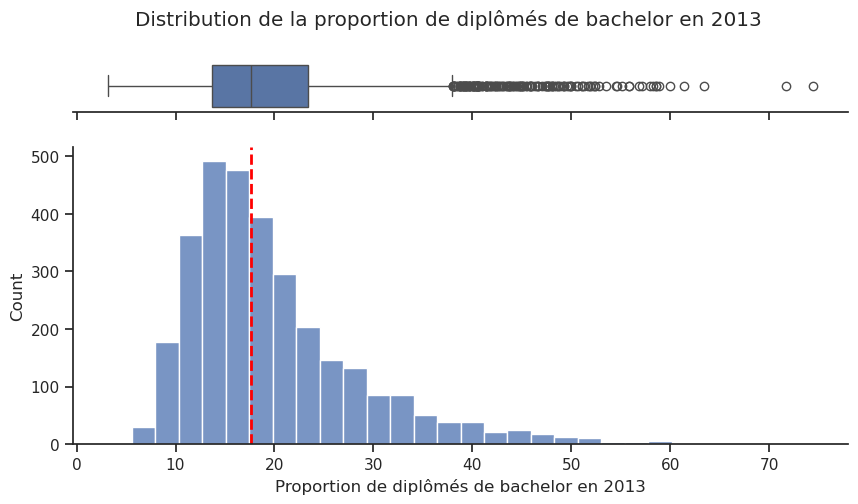

In [17]:
sns.set(style="ticks")
x = total_db_geo["bachelors_deg_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (10, 5), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution de la proportion de diplômés de bachelor en 2013")
ax_hist.set_xlabel('Proportion de diplômés de bachelor en 2013')

On obtient encore une fois une courbe normale biaisé vers la droite de la distribution. Les valeurs aberrantes sont toutes situées de ce côté de la distribution. On voit bien sur le boxplot les inégalités très importantes qui peut exister entre les comtés. Cela est assez logique : le comté étant un découpage relativement fin du territoire américain, il n'est pas étonnant de grosses variations à cette échelle.

## Bénéficiaires du programme SNAP

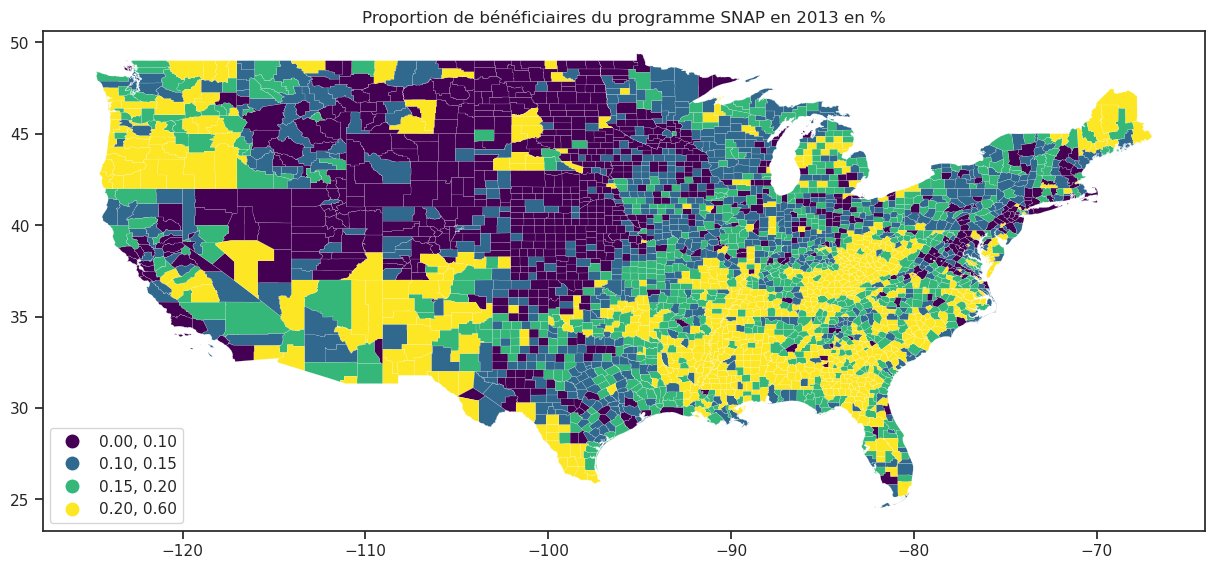

In [18]:
total_db_geo["snap_share_year_2013"] = total_db_geo["snap_beneficiaries_year_2013"] / total_db_geo["resident_pop_year_2013"] / 1000
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "snap_share_year_2013", legend = True, scheme = "QUANTILES", 
k=4, linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Proportion de bénéficiaires du programme SNAP en 2013 en %")
plt.show()

On retrouve la distinction Nord-Est privilégié / Sud-Est défavorisé ici encore : les taux de bénéficaires les plus bas sont situés au Nord-Est et les plus importants dnas le Sud, et en particulier le Sud-Est. Le Nord et le centre du pays font partie des deux premiers quartiles, alors que le Nord-Ouest fait également partie des territoires avec la plus grande part de bénéficiaires.

Text(0.5, 0, 'Proportion de bénéficiaire du SNAP en 2013 en %')

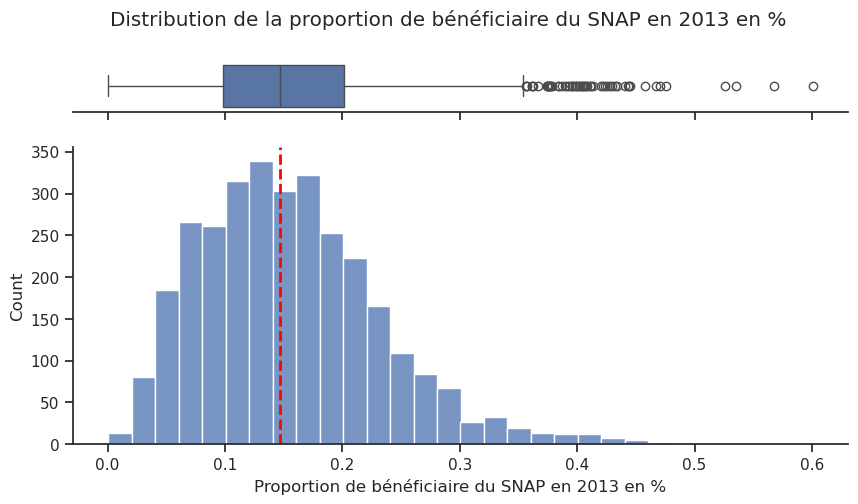

In [19]:

sns.set(style="ticks")
x = total_db_geo["snap_share_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution de la proportion de bénéficiaire du SNAP en 2013 en %")
ax_hist.set_xlabel('Proportion de bénéficiaire du SNAP en 2013 en %')

On retrouve globalement la même forme de distribution, mais un peu plus étalée que les deux vues précédemment. Encore une fois, la courbe en cloche est biaisée vers la droite, où se situent toutes les valeurs aberrantes. 

## Taux de chômage

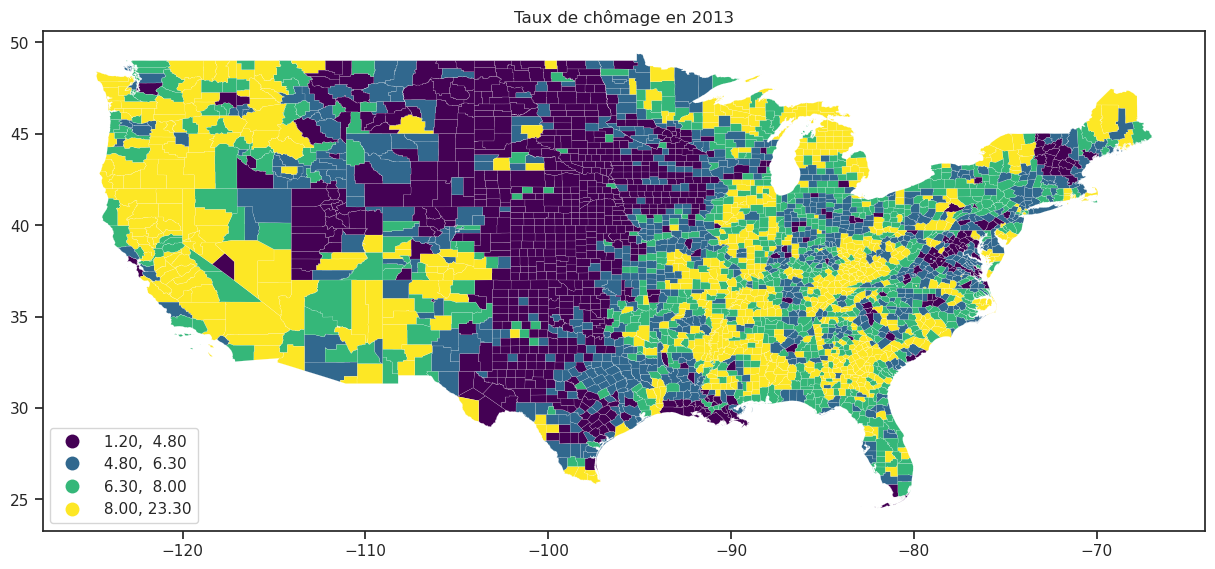

In [20]:
total_db_geo.plot(aspect = 1, figsize = (15,15), column = "unemp_rate_year_2013", legend = True, scheme = "QUANTILES", k=4, 
linewidth = 0.1, legend_kwds={'loc': 'lower left'})
plt.title("Taux de chômage en 2013")
plt.show()

La répartition géographique du taux de chômage semble totalement différente des autres : toute la côte Ouest est dans le dernier quartile, et l'Est aussi, alors que c'est le centre qui a le taux de chômage le plus bas. Certaines zones connues pour leur désindustrialisation sont dans le dernier quartile, comme la région de Détroit par exemple.

Text(0.5, 0, 'Taux de chômage en 2013')

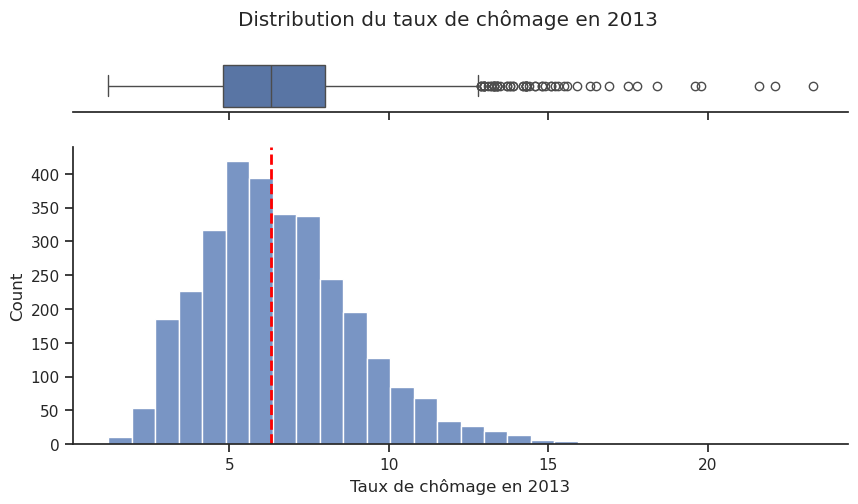

In [21]:
sns.set(style="ticks")
x = total_db_geo["unemp_rate_year_2013"] 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,5))

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=30, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

median_value = x.median()
ax_hist.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

plt.suptitle("Distribution du taux de chômage en 2013")
ax_hist.set_xlabel('Taux de chômage en 2013')

La distribution a la forme que nous avons vu déjà plusieurs fois. On remarque que les valuers aberrantes sont de plus en plus espacées au fur et à mesure qu'elles augmentent.

## Vote pour les démocrates à l'élection présidentielle de 2016

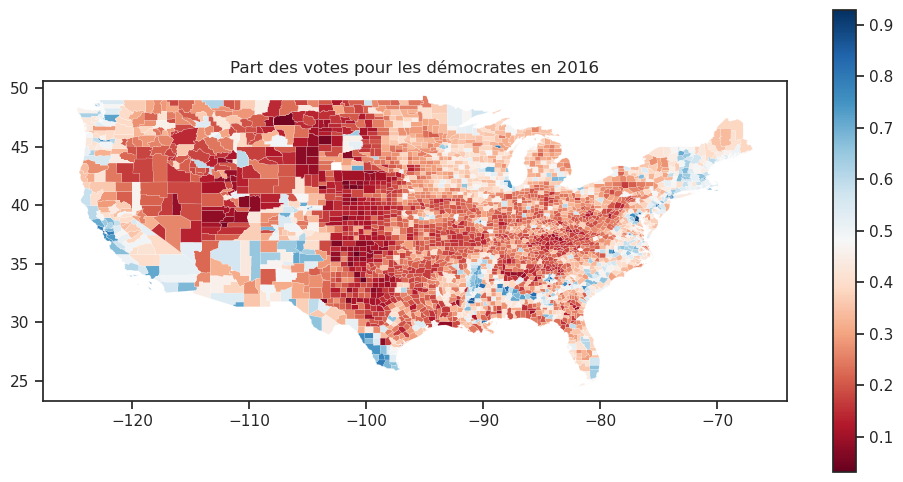

In [22]:
total_db_geo.plot(aspect = 1, figsize = (12,6), column = "per_dem", legend = True, linewidth = 0.1, cmap = "RdBu")
plt.title("Part des votes pour les démocrates en 2016")
plt.show()

Cette représentation a le défaut de laisser penser que les républicains ont largement gagné le vote de 2016, puisque la carte est en grande majorité rouge. Pour remédier à cela, il faut faire une représentation qui pondère le vote par la population résidente de 2016.

/tmp/ipykernel_48750/341852764.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_db_geo['centroid'] = total_db_geo['geometry'].centroid


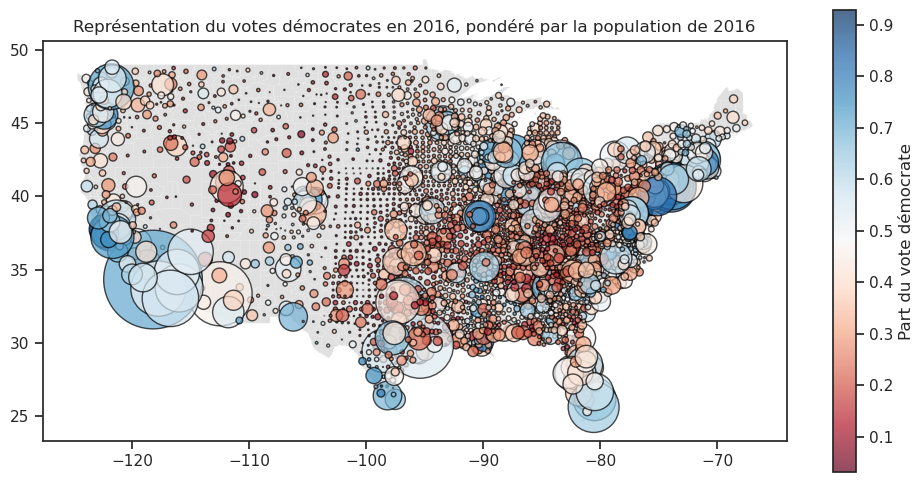

In [23]:
total_db_geo = total_db_geo.to_crs('4329')
total_db_geo['centroid'] = total_db_geo['geometry'].centroid

# Create a GeoDataFrame with centroids
gdf_centroids = gpd.GeoDataFrame(total_db_geo[['resident_pop_year_2016', "per_dem", "centroid"]], geometry=total_db_geo['centroid'])

# Plot
# Plot polygons
fig, ax = plt.subplots(figsize=(12, 6))
total_db_geo.plot(ax=ax, color='lightgray', alpha=0.7, edgecolor='white', linewidth=0.1)

# Plot centroids as dots with color and size based on variables
sc = ax.scatter(
    gdf_centroids['centroid'].x,
    gdf_centroids['centroid'].y,
    c=gdf_centroids['per_dem'],
    cmap='RdBu',
    s=gdf_centroids['resident_pop_year_2016']*0.5,
    alpha=0.7,
    marker='o',
    edgecolors='black',  # Add black edges for better visibility
    linewidths=1,        # Adjust linewidth of the edges
)

# Set plot title and labels
plt.title('Représentation du votes démocrates en 2016, pondéré par la population de 2016')

# Add colorbar
cbar = plt.colorbar(sc, label='Part du vote démocrate')

# Show the plot
plt.show()

Même si la carte n'est pas forcément évidente à lire à cause des chevauchements des cercles (dont la taille dépend de la population résidente), on voit que le bleu et le rouge (et donc les électeurs démocrates et républicains) sont relativement égaux sur le territoire, ce qui est plus fidèle au résultat de l'élection. La Californie et le Nord-Est (qui sont souvent favorisés dans les statistiques précédentes) sont plutôt démocrates, alors que le Sud-Est, plus défavorisé, penche plutôt en faveur des républicains

## Comparaison des différentes années

Nous avons les données sur plusieurs années (entre 2013 et 2018, années de constitution de la base des incidents). Plutôt que faire une carte par année, nous allons vérifier que les données ne changent pas trop d'une année à l'autre, et que les tendances générales restent stables. Nous allons donc regarder les matrices de corrélation d'une même variable entre différentes années.

### Chômage

In [24]:
matrix = total_db_geo[["unemp_rate_year_2013", "unemp_rate_year_2014", "unemp_rate_year_2015", 
"unemp_rate_year_2016", "unemp_rate_year_2017", "unemp_rate_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des taux de chômage", labels = {"color" : "Corrélation"})
fig.show()

On voit que toutes les corrélations sont supérieures à 80%, ce qui est relativement important et laisse penser que le taux de chômage reste relativement stable sur les années.

Text(0.5, 1, 'Hexbin du taux de chômage entre 2013 et 2018')

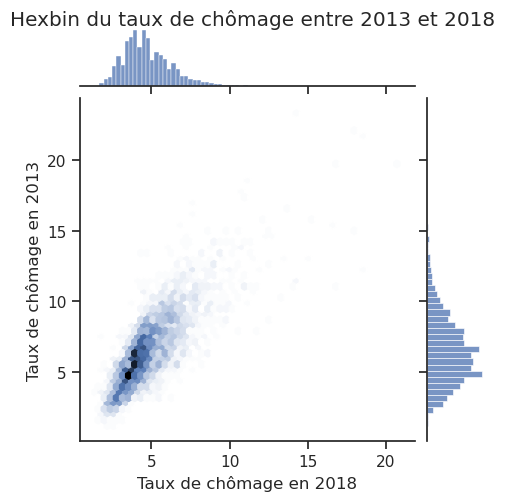

In [25]:
sns.set_theme(style="ticks")
x = total_db_geo["unemp_rate_year_2018"]
y = total_db_geo["unemp_rate_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex", height = 5)
joint_plot.set_axis_labels("Taux de chômage en 2018", "Taux de chômage en 2013")
joint_plot.fig.suptitle("Hexbin du taux de chômage entre 2013 et 2018", y =1)

Cet hexbin montre que les taux de chômage entre 2013 et 2018 sont effectivement positivement corrélés. On remarque également qu'il n'y a que très peu de comtés ayant un faible taux à une année et un taux important pour l'autre année, ce qui suggère que les analyses resteront valables peu importe l'année retenue pour cette variable. Il convient de vérifier cela pour les autres variables.

### Revenu annuel médian par foyer

In [26]:
matrix = total_db_geo[["med_h_income_year_2013", "med_h_income_year_2014", "med_h_income_year_2015", 
"med_h_income_year_2016", "med_h_income_year_2017", "med_h_income_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des revenues médians", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, 'Hexbin du revenu annuel médian par foyer entre 2013 et 2018')

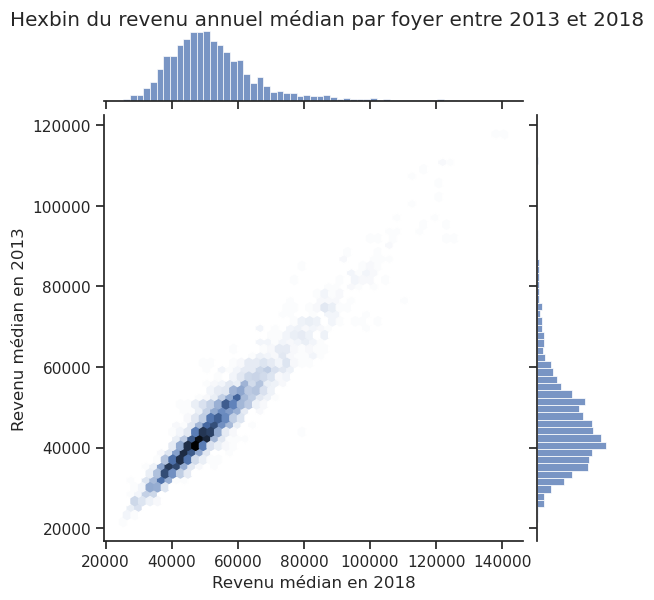

In [27]:
sns.set_theme(style="ticks")
x = total_db_geo["med_h_income_year_2018"]
y = total_db_geo["med_h_income_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Revenu médian en 2018", "Revenu médian en 2013")
joint_plot.fig.suptitle("Hexbin du revenu annuel médian par foyer entre 2013 et 2018", y = 1)

On observe la même chose que pour le chômage : les corrélations sont mêmes plus importantes puisque toutes supérieures à 95%. Le hexbin montre également cette quasi parfaite corrélation entre les deux années extrêmes, car tous les comtés sont situés sur la diagonale. Il y a donc très peu de comtés qui sont passés d'un revenu médian important à un revenu médian faible (ou l'inverse).

### Proportion de détenteurs d'un bachelor

In [28]:
matrix = total_db_geo[["bachelors_deg_year_2013", "bachelors_deg_year_2014", "bachelors_deg_year_2015", 
"bachelors_deg_year_2016", "bachelors_deg_year_2017", "bachelors_deg_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des parts de détenteurs de bachelor", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, "Hexbin de la part de détenteurs d'un bachelor entre 2013 et 2018")

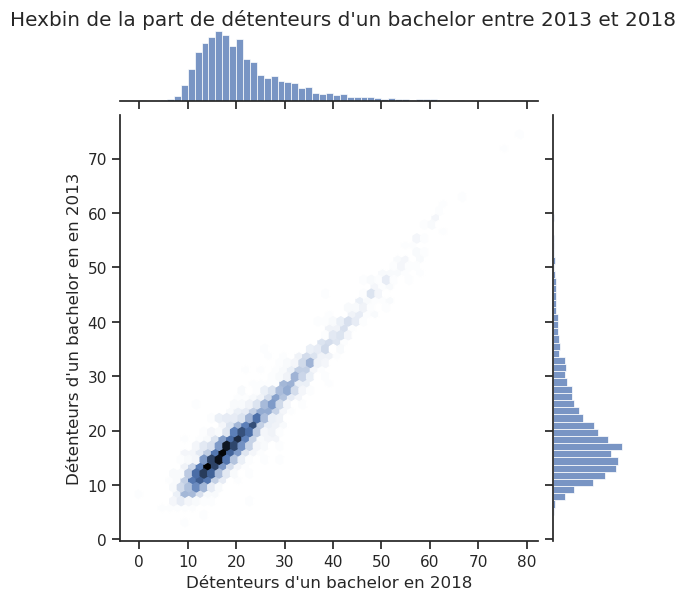

In [29]:
sns.set_theme(style="ticks")
x = total_db_geo["bachelors_deg_year_2018"]
y = total_db_geo["bachelors_deg_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Détenteurs d'un bachelor en 2018", "Détenteurs d'un bachelor en en 2013")
joint_plot.fig.suptitle("Hexbin de la part de détenteurs d'un bachelor entre 2013 et 2018", y =1)

Encore une fois, les données suggèrent qu'utiliser une année ou l'autre n'aura pas d'influence sur les résultats de l'analyse du fait de la similarité des années.

### Bénéficaires du programme SNAP

In [30]:
total_db_geo["snap_share_year_2013"] = total_db_geo["snap_beneficiaries_year_2013"] / total_db_geo["resident_pop_year_2013"] / 1000
total_db_geo["snap_share_year_2014"] = total_db_geo["snap_beneficiaries_year_2014"] / total_db_geo["resident_pop_year_2014"] / 1000
total_db_geo["snap_share_year_2015"] = total_db_geo["snap_beneficiaries_year_2015"] / total_db_geo["resident_pop_year_2015"] / 1000
total_db_geo["snap_share_year_2016"] = total_db_geo["snap_beneficiaries_year_2016"] / total_db_geo["resident_pop_year_2016"] / 1000
total_db_geo["snap_share_year_2017"] = total_db_geo["snap_beneficiaries_year_2017"] / total_db_geo["resident_pop_year_2017"] / 1000
total_db_geo["snap_share_year_2018"] = total_db_geo["snap_beneficiaries_year_2018"] / total_db_geo["resident_pop_year_2018"] / 1000


In [31]:
matrix = total_db_geo[["snap_share_year_2013", "snap_share_year_2014", "snap_share_year_2015", 
"snap_share_year_2016", "snap_share_year_2017", "snap_share_year_2018"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation des parts de bénéficiaires du SNAP", labels = {"color" : "Corrélation"})
fig.show()

Text(0.5, 1, 'Hexbin de la part bénéficaires du SNAP entre 2013 et 2018')

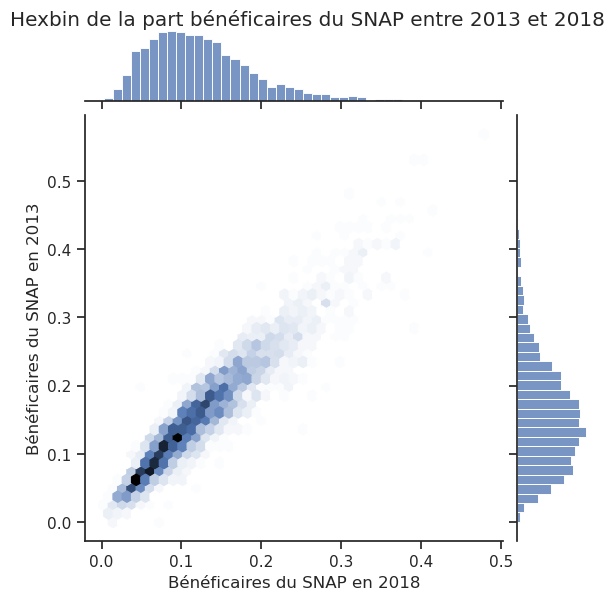

In [32]:
sns.set_theme(style="ticks")
x = total_db_geo["snap_share_year_2018"]
y = total_db_geo["snap_share_year_2013"]
joint_plot = sns.jointplot(x=x, y=y, kind="hex")
joint_plot.set_axis_labels("Bénéficaires du SNAP en 2018", "Bénéficaires du SNAP en 2013")
joint_plot.fig.suptitle("Hexbin de la part bénéficaires du SNAP entre 2013 et 2018", y =1)

Même si la diagonale est plus étalée en haut à droite (donc quand les valeurs sont relativement importantes), rien ne semble indiquer qu'il y a des différences significatives dans la structure des données entre ces deux années.

## Corrélation entre les variables

Nous allons arbitrairement prendre les variables de 2013. Nous avons vu précédemment que cela n'allait pas changer beaucoup les résultats des analyses.

In [33]:
matrix = total_db_geo[["unemp_rate_year_2013", "snap_share_year_2013", "bachelors_deg_year_2013", "med_h_income_year_2013", "per_dem", "score_legis"]].corr()
fig = px.imshow(matrix, title= "Matrice de corrélation de 2013", labels = {"color" : "Corrélation"})
fig.show()

Les corrélations sont logiques et relativement aisées à expliquer, sauf pour le score legislatif. Le taux de chômage est postiviment corrélé aux bénéficiaires de l'aide alimentaire (suggère des comtés paupérisés), négativement à la part de détenteurs d'un bachelor (les plus éduqués sont a priori moins au chômage que les autres), négativement au revenu médian (plus il y a de chômage, plus ce revenu est abs a priori), et positivement au vote démocrate (plus diffile à bien expliquer).

Globalement, les variables "positives" comme le revenu médian et la part de diplômés sont positivement corrélées entre elles et négativement corrélées avec les variables "négatives" comme la part de bénéficiaires de l'aide alimentaire et le taux de chômage. Le vote démocrate a la même corrélation avec toutes les variables (0.2), sauf pour la part de détenteurs d'un bachelor, qui est plus forte (0.4) : cela s'explique bien car les plus éduqués votent plus démocrates que les autres.

La corrélation la plus forte du score législatif (hormis avec lui-même) est avec le revenu médian et avec le vote démocrate. Peut-être que certains états pauvres votent démocrates et ont donc une législation plus forte sur les armes, mais il est difficile de tirer de réelles conclusions à partir de ces corrélations là.

# Liens de ces caractéristiques avec la violence par arme à feu

Maintenant que nous avons décrit plus en détail les comtés, nous allons esssayer de voir comment cela s'articule avec les données sur les violences par arme à feu. Commençons par la densité des incidents.

In [34]:
#count of incidents for each county
incident_count_by_county = merge_geo.groupby('id_county')['incident_id'].count().reset_index() 

#new dataframe with the count
incident_pop_geo=pd.merge(incident_count_by_county,merge_geo, on='id_county', how='right')
incident_pop_geo.rename(columns={'incident_id_x':'incident_count_by_county'}, inplace=True)

#calcul de la densité
agg_incident_county = incident_pop_geo.groupby('id_county').agg({'incident_count_by_county': 'first', 'resident_pop_year_2016': 'first'}).reset_index()
agg_incident_county['incident_density'] = agg_incident_county['incident_count_by_county'] / agg_incident_county['resident_pop_year_2016'] / 1000


# Create a GeoDataFrame with the incident density
incident_density_geo = total_db_geo.merge(agg_incident_county, on='id_county', how='left')
incident_density_geo["incident_density"] = incident_density_geo["incident_density"] * 1000

# ajouter la valeur à 0 à ceux qui n'apparaissaient pas dans la base de gun violences
incident_density_geo["incident_density"] = incident_density_geo["incident_density"].fillna(0)
incident_density_geo["incident_count_by_county"] = incident_density_geo["incident_count_by_county"].fillna(0)

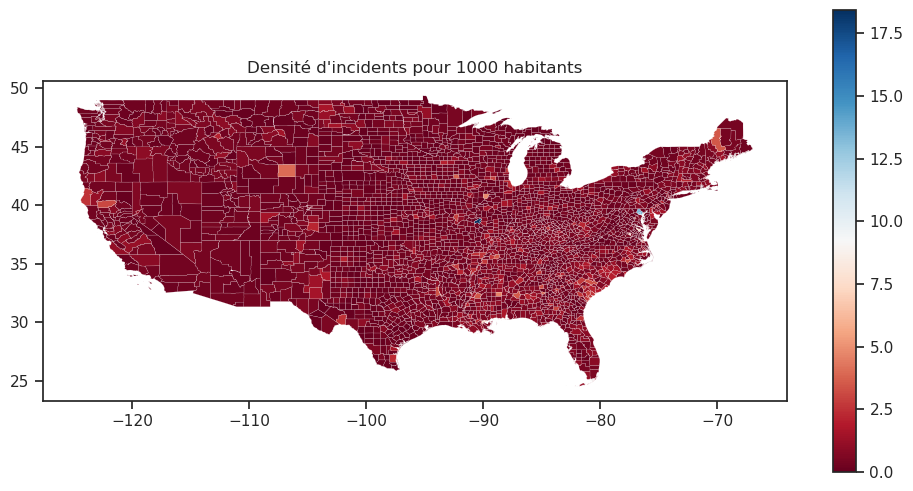

In [35]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu", 
column = "incident_density")

plt.title("Densité d'incidents pour 1000 habitants")
plt.show()

Encore une fois, la carte est difficile à lire. Nous allons donc utiliser la même méthode que précédemment et regrouper les comtés dans 4 quantiles.

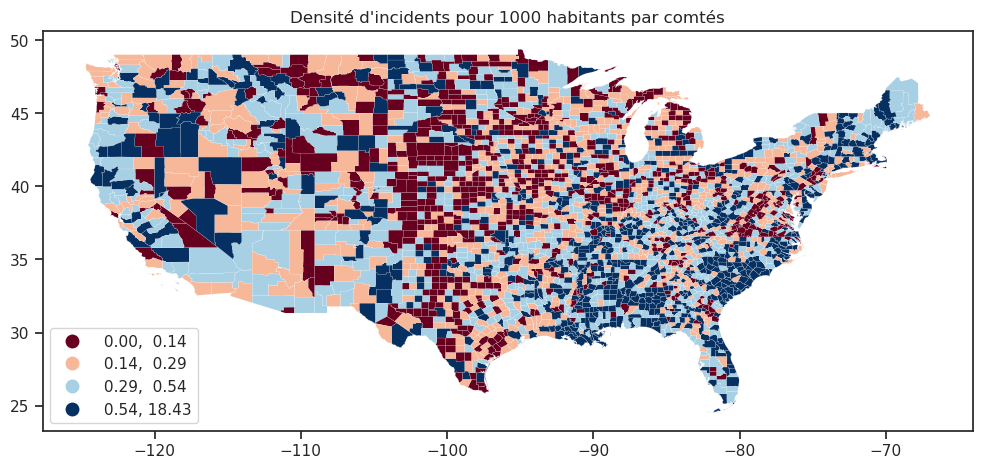

In [36]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu", 
column = "incident_density", scheme = "QUANTILES", k=4, legend_kwds={'loc': 'lower left'})

plt.title("Densité d'incidents pour 1000 habitants par comtés")
plt.show()

Le centre du pays semble avoir une assez faible densité d'incidents, contrairements à la côte Est. La côte Ouest est quant à elle plus contrastée.

In [41]:
incident_density_geo["state_resident_pop_year_2016"] = incident_density_geo.groupby("Etat")["resident_pop_year_2016_x"].transform("sum")
incident_density_geo["incident_count_by_state"] = incident_density_geo.groupby("Etat")["incident_count_by_county"].transform("sum")
incident_density_geo["incident_density_state"] = incident_density_geo["incident_count_by_state"] / incident_density_geo["state_resident_pop_year_2016"]

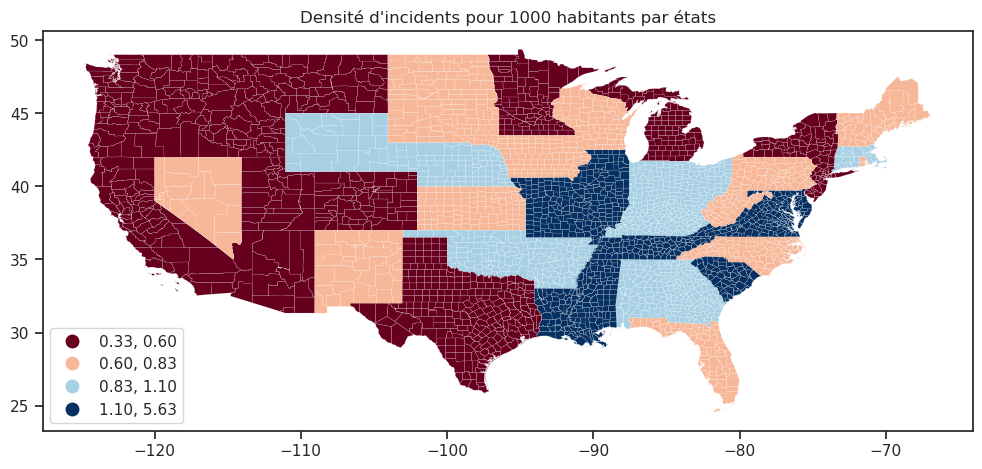

In [42]:
incident_density_geo.plot(aspect = 1, figsize = (12,6), legend = True, linewidth = 0.1, cmap = "RdBu", 
column = "incident_density_state", scheme = "QUANTILES", k=4, legend_kwds={'loc': 'lower left'})

plt.title("Densité d'incidents pour 1000 habitants par états")
plt.show()